<a href="https://colab.research.google.com/github/amino19/Shape-AI-Notebook/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING MODULES**

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**DOWNLOAD & PREPARE THE CIFAR10 DATASET**

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

**CREATING CONVOLUTIONAL BASE**

In [4]:
# Sequencing model
model = models.Sequential()

# Adding layers to it..
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # Last Convolutional layer

In [6]:
# defines summary of the entire model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


**ADD DENSE LAYER AS FRAMEWORK, ON TOP**

In [7]:
# Flatten the entire convolutional outputs (in matrix)
model.add(layers.Flatten())

# Adding dense layer (convolutional layer) 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [8]:
# By complete architecture of model, we get :
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

**COMPILING & TRAIN MODEL**

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.7255 - accuracy: 0.3599 - val_loss: 1.2624 - val_accuracy: 0.5515
Epoch 2/10
1563/1563 [==============================] - 70s 44ms/step - loss: 1.1711 - accuracy: 0.5857 - val_loss: 1.0952 - val_accuracy: 0.6103
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9961 - accuracy: 0.6530 - val_loss: 1.0484 - val_accuracy: 0.6388
Epoch 4/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8730 - accuracy: 0.6939 - val_loss: 0.9273 - val_accuracy: 0.6734
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7936 - accuracy: 0.7240 - val_loss: 0.8803 - val_accuracy: 0.6958
Epoch 6/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.7233 - accuracy: 0.7471 - val_loss: 0.8327 - val_accuracy: 0.7103
Epoch 7/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.6602 - accuracy: 0.7708 - val_loss: 0.8699 -

**EVALUATE IT..**

313/313 - 4s - loss: 0.8957 - accuracy: 0.7103


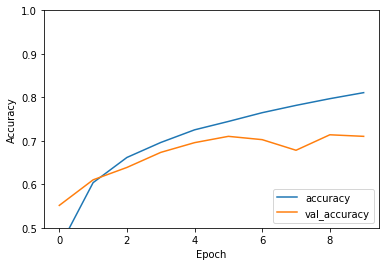

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [11]:
print(test_acc)

0.7103000283241272
